Movies shape: (10329, 3)
Ratings shape: (105339, 4)
Movies Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB
Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB

Sample from movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   

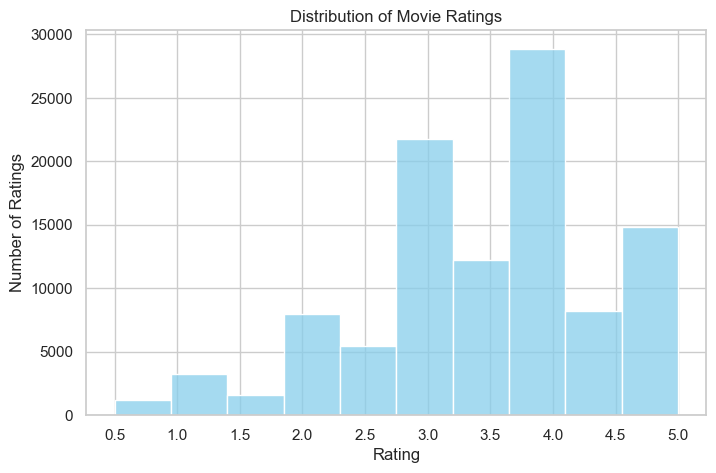

C:\Users\fiona\AppData\Local\Temp\ipykernel_18328\2026994427.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='genres', data=genre_stats, palette='coolwarm')


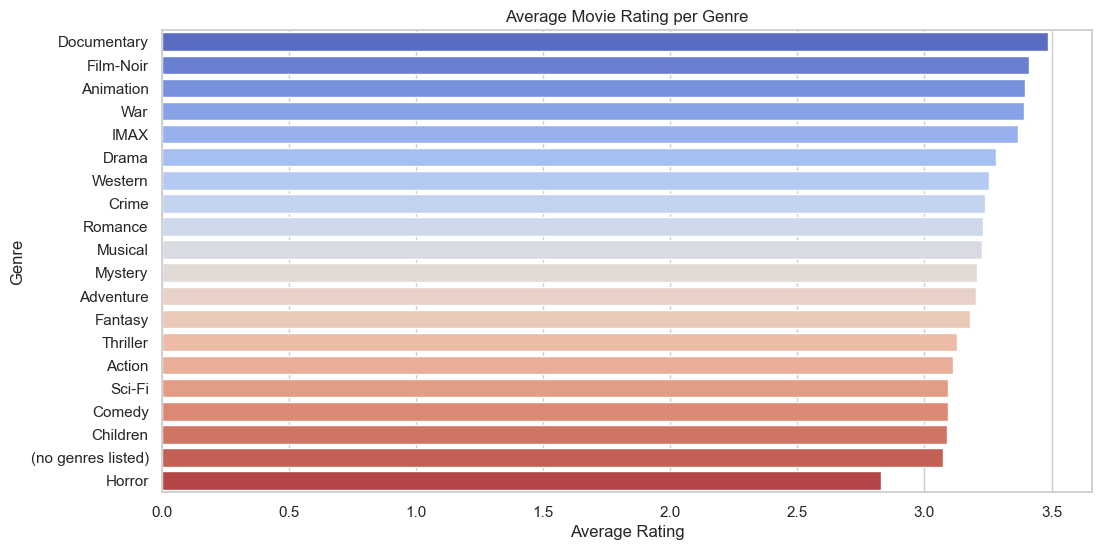

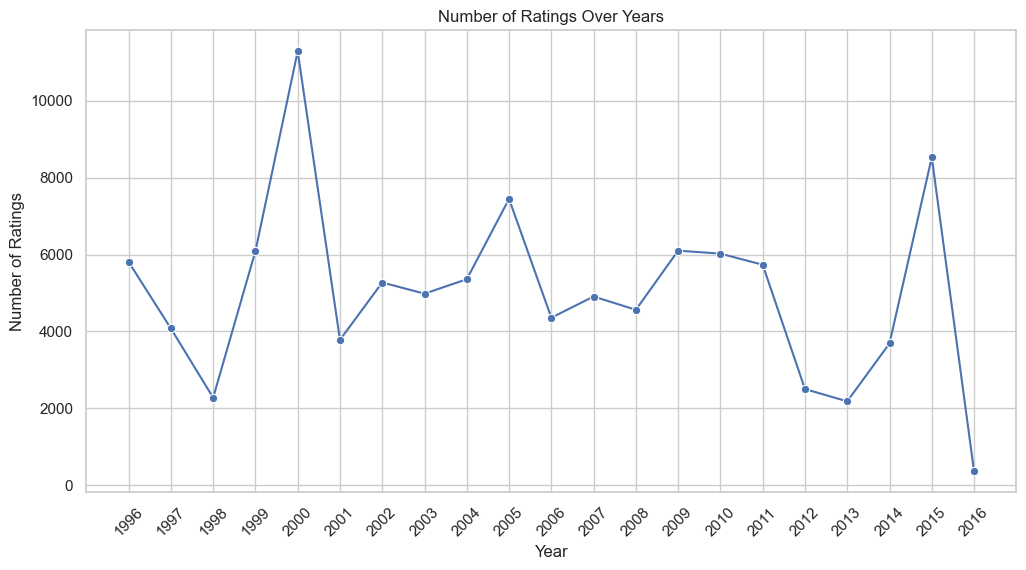

C:\Users\fiona\AppData\Local\Temp\ipykernel_18328\2026994427.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='title', data=top_rated_count, palette='viridis')


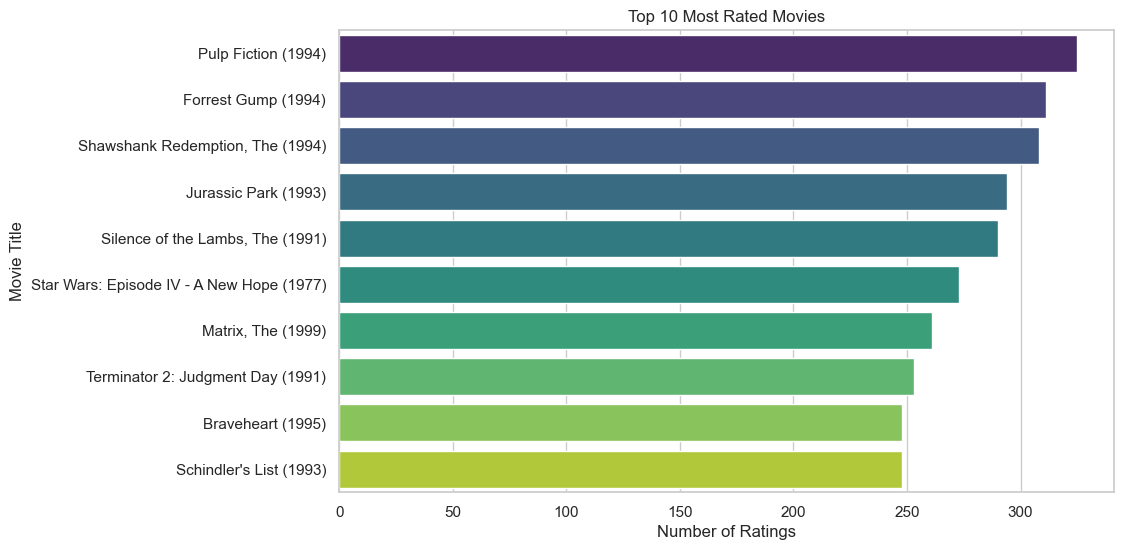

C:\Users\fiona\AppData\Local\Temp\ipykernel_18328\2026994427.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_mean', y='title', data=top_avg_rated, palette='magma')


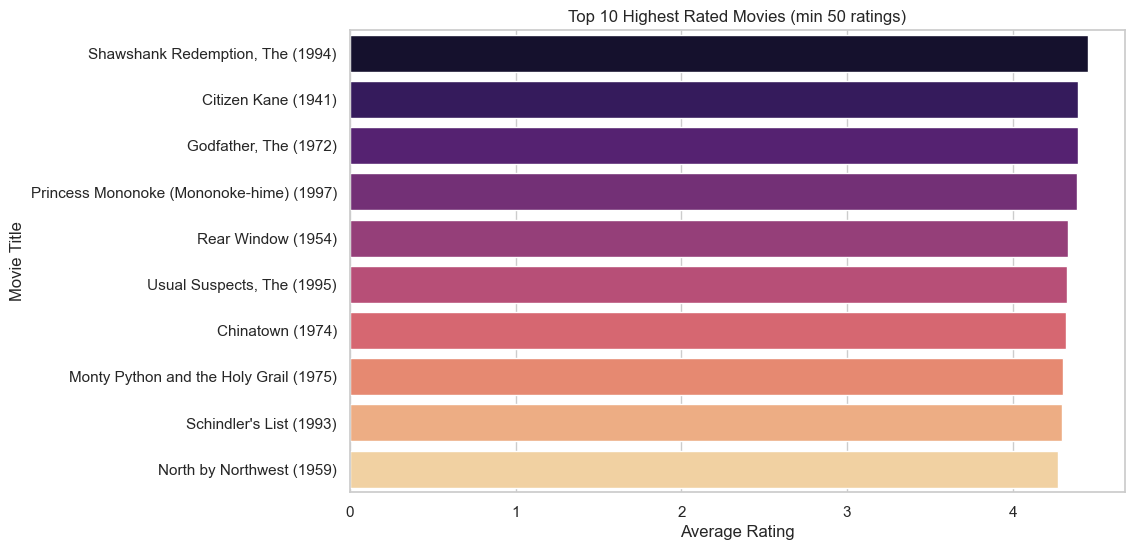

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
movies = pd.read_csv(r"C:\Users\fiona\Downloads\movies.csv")
ratings = pd.read_csv(r"C:\Users\fiona\Downloads\ratings.csv")

# Basic info
print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)

print("Movies Info:") 
movies.info()
print("Ratings Info:")
ratings.info()

# Peek at data
print("\nSample from movies:")
print(movies.head())

print("\nSample from ratings:")
print(ratings.head())

# Duplicate rows check
print("Duplicate rows in movies:", movies.duplicated().sum())
print("Duplicate rows in ratings:", ratings.duplicated().sum())

# Missing values check
print("Missing values in movies:", movies.isnull().sum())
print("\nMissing values in ratings:", ratings.isnull().sum())

if 'timestamp' in ratings.columns:
    ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s', errors='coerce')
print(ratings['timestamp'].head())

# To recheck if datatype conversion
print("Movies Info:") 
movies.info()
print("Ratings Info:")
ratings.info()

# Aggregation: number of ratings & average rating per movie
movie_stats = ratings.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

# Merge with movies dataset
movies_agg = movies.merge(movie_stats, on='movieId', how='left')

# Filling NaN values 
movies_agg['rating_count'] = movies_agg['rating_count'].fillna(0).astype(int)
movies_agg['rating_mean'] = movies_agg['rating_mean'].fillna(0.0)

# Top 5 movies by number of ratings
print("\nTop 5 movies by rating count:")
print(movies_agg.sort_values('rating_count', ascending=False).head(5)[['title','rating_count','rating_mean']])

# Top 5 movies by average rating (with min 50 ratings)
print("\nTop 5 movies by average rating (min 50 ratings):")
print(movies_agg[movies_agg['rating_count'] >= 50].sort_values('rating_mean', ascending=False).head(5)[['title','rating_count','rating_mean']])

# ----------Ratings Distribution Histogram------------
# Setting plot style
sns.set(style="whitegrid")

# Plotting histogram
plt.figure(figsize=(8,5))
sns.histplot(ratings['rating'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.show()

# Splitting genres into separate rows
movies_genres = movies_agg.copy()
movies_genres = movies_genres.assign(genres=movies_genres['genres'].str.split('|'))
movies_genres = movies_genres.explode('genres')

# --------------Genre Analysis-------------
# Average rating per genre
genre_stats = movies_genres.groupby('genres').agg(
    avg_rating=('rating_mean', 'mean'),
    rating_count=('rating_count', 'sum')
).sort_values('avg_rating', ascending=False).reset_index()

# Plotting average rating per genre
plt.figure(figsize=(12,6))
sns.barplot(x='avg_rating', y='genres', data=genre_stats, palette='coolwarm')
plt.title('Average Movie Rating per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# ----------------Ratings Over Time------------------
# Extract year from timestamp and convert to int
ratings['year'] = ratings['timestamp'].dt.year.astype(int)

# Count number of ratings per year
ratings_per_year = ratings.groupby('year').size().reset_index(name='num_ratings')

# Plot ratings per year
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='num_ratings', data=ratings_per_year, marker='o')
plt.title('Number of Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
# Force integer ticks for years
plt.xticks(ratings_per_year['year'], rotation=45)
plt.show()

# ------------------Top 10 Most Rated Movies--------------------
top_rated_count = movies_agg.sort_values('rating_count', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='rating_count', y='title', data=top_rated_count, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

# ----------------Top 10 Highest-Rated Movies (min 50 ratings)------------------
top_avg_rated = movies_agg[movies_agg['rating_count'] >= 50].sort_values('rating_mean', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='rating_mean', y='title', data=top_avg_rated, palette='magma')
plt.title('Top 10 Highest Rated Movies (min 50 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()
